### Bike Sharing Assignment

# Background :
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

# Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Import Libraries

In [723]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor 

### Understanding data

In [641]:
#read data from csv
bikeSharing = pd.read_csv('pandasData/day.csv')
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [642]:
#check shape of data frame
bikeSharing.shape

(730, 16)

In [643]:
#check dataset range min max median ect
bikeSharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [644]:
#checking dataset and data types
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [645]:
#check null values
bikeSharing.isnull().mean()*100

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

No null values

In [647]:
#check duplicates
bikeSharing.duplicated().sum()

0

No duplicate values

In [649]:
#check number of unique values
bikeSharing.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

In [650]:
# final understanding on dataset
bikeSharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Steps to be taken in cleaning
- "Instant" is just serial number can be dropped
- "dteday" is not required as we already have year, month, weekday etc hence can be dropped
- "casual" and "registered", the 'cnt' variable indicates the total number of bike rentals, including both casual and registered
- "season", "mnth", "weathersit", "weekday" need to be converted categorical variable 

### Cleaning Data

In [653]:
# drop columns which are not required for analysis
bikeSharing.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [654]:
#check data frame
bikeSharing.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [655]:
# mapping the categorical variables to their values
bikeSharing['season'] = bikeSharing['season'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikeSharing['mnth'] = bikeSharing['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bikeSharing['weekday'] = bikeSharing['weekday'].map({0:"Sun" ,1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thurs', 5: 'Fri', 6: 'Sat'})
bikeSharing['weathersit'] = bikeSharing['weathersit'].map({1:'Clear',2:'Misty',3:'Light_rain_snow',4:'Heavy_rain_snow'})

In [656]:
bikeSharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


#### Plot based Analysis

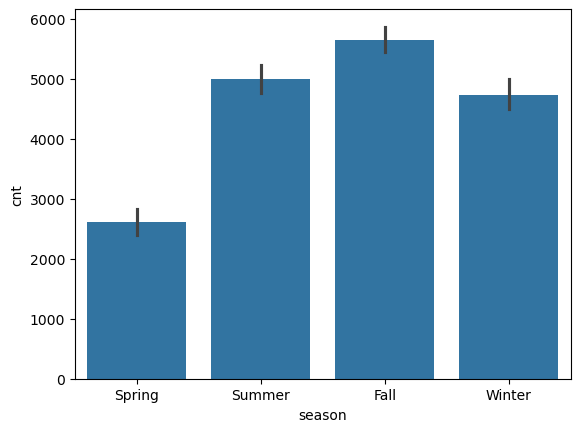

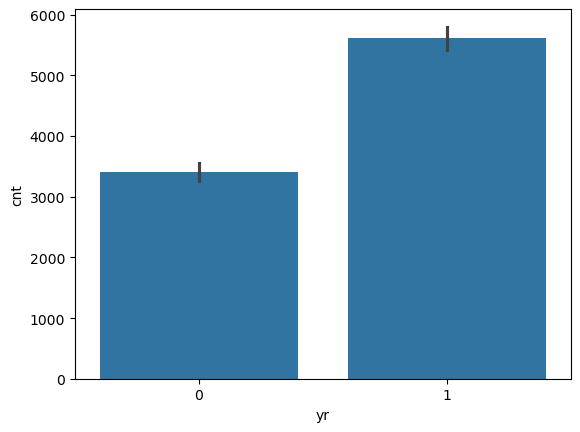

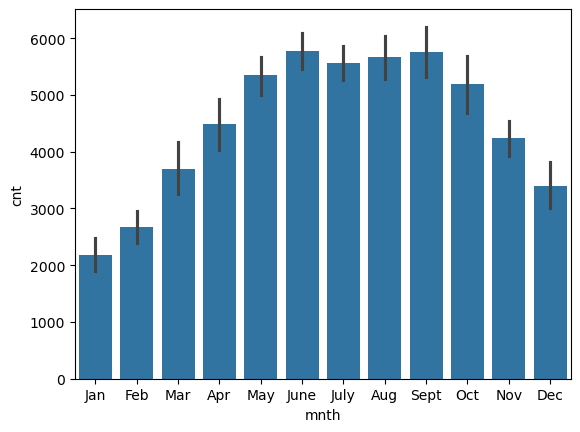

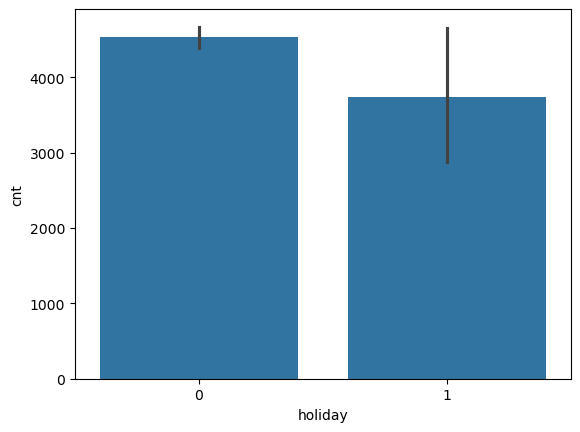

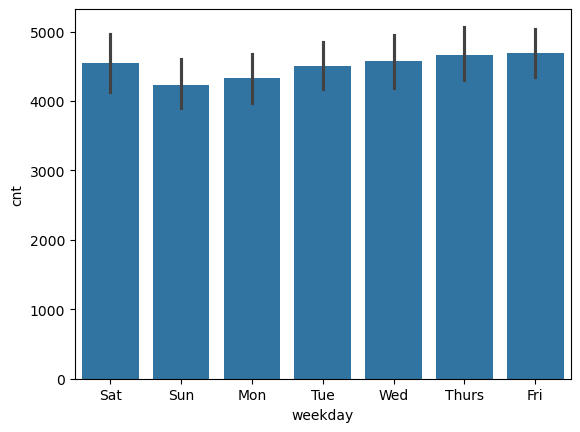

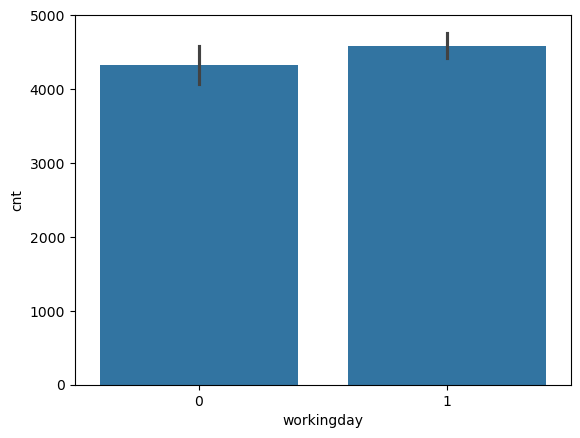

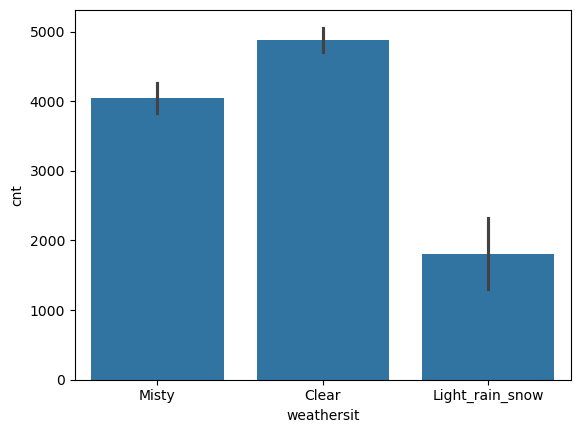

In [658]:
sns.barplot(data=bikeSharing,x='season',y='cnt',hue=None)
plt.show()
sns.barplot(data=bikeSharing,x='yr',y='cnt',hue=None)
plt.show()
sns.barplot(data=bikeSharing,x='mnth',y='cnt',hue=None)
plt.show()
sns.barplot(data=bikeSharing,x='holiday',y='cnt',hue=None)
plt.show()
sns.barplot(data=bikeSharing,x='weekday',y='cnt',hue=None)
plt.show()
sns.barplot(data=bikeSharing,x='workingday',y='cnt',hue=None)
plt.show()
sns.barplot(data=bikeSharing,x='weathersit',y='cnt',hue=None)
plt.show()

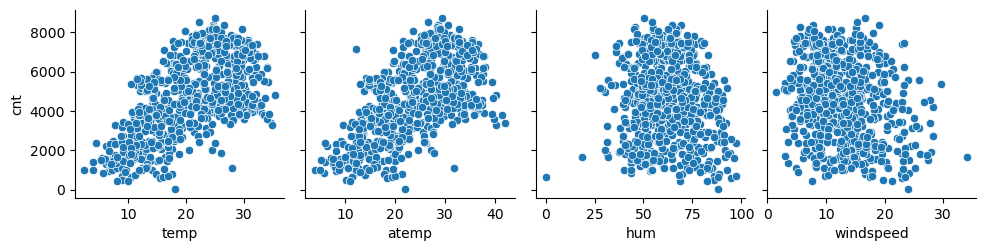

In [659]:
# creating a pairplot between the numerical variables
sns.pairplot(data=bikeSharing,x_vars=['temp','atemp','hum','windspeed'],y_vars='cnt')
plt.show()

### Preparing Data

In [661]:
#create dummy values for categorical variables
months = pd.get_dummies(bikeSharing['mnth'] ,drop_first=True, dtype=int)
weekdays =pd.get_dummies(bikeSharing['weekday'],drop_first=True, dtype=int)
weathersit =pd.get_dummies(bikeSharing['weathersit'],drop_first=True, dtype=int)
seasons =pd.get_dummies(bikeSharing['season'],drop_first=True, dtype=int)

In [662]:
#concat all 
bikeSharing = pd.concat([bikeSharing, months, weekdays, weathersit, seasons], axis=1)
bikeSharing.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Sat,Sun,Thurs,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0
5,Spring,0,Jan,0,Thurs,1,Clear,8.378268,11.66045,51.8261,...,0,0,1,0,0,0,0,1,0,0
6,Spring,0,Jan,0,Fri,1,Misty,8.057402,10.44195,49.8696,...,0,0,0,0,0,0,1,1,0,0
7,Spring,0,Jan,0,Sat,0,Misty,6.765000,8.11270,53.5833,...,1,0,0,0,0,0,1,1,0,0
8,Spring,0,Jan,0,Sun,0,Clear,5.671653,5.80875,43.4167,...,0,1,0,0,0,0,0,1,0,0
9,Spring,0,Jan,0,Mon,1,Clear,6.184153,7.54440,48.2917,...,0,0,0,0,0,0,0,1,0,0


In [663]:
#drop main source columns for added dummies
bikeSharing.drop(['mnth','weekday','weathersit','season'],inplace=True,axis='columns')


In [664]:
bikeSharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Aug              730 non-null    int64  
 9   Dec              730 non-null    int64  
 10  Feb              730 non-null    int64  
 11  Jan              730 non-null    int64  
 12  July             730 non-null    int64  
 13  June             730 non-null    int64  
 14  Mar              730 non-null    int64  
 15  May              730 non-null    int64  
 16  Nov              730 non-null    int64  
 17  Oct             

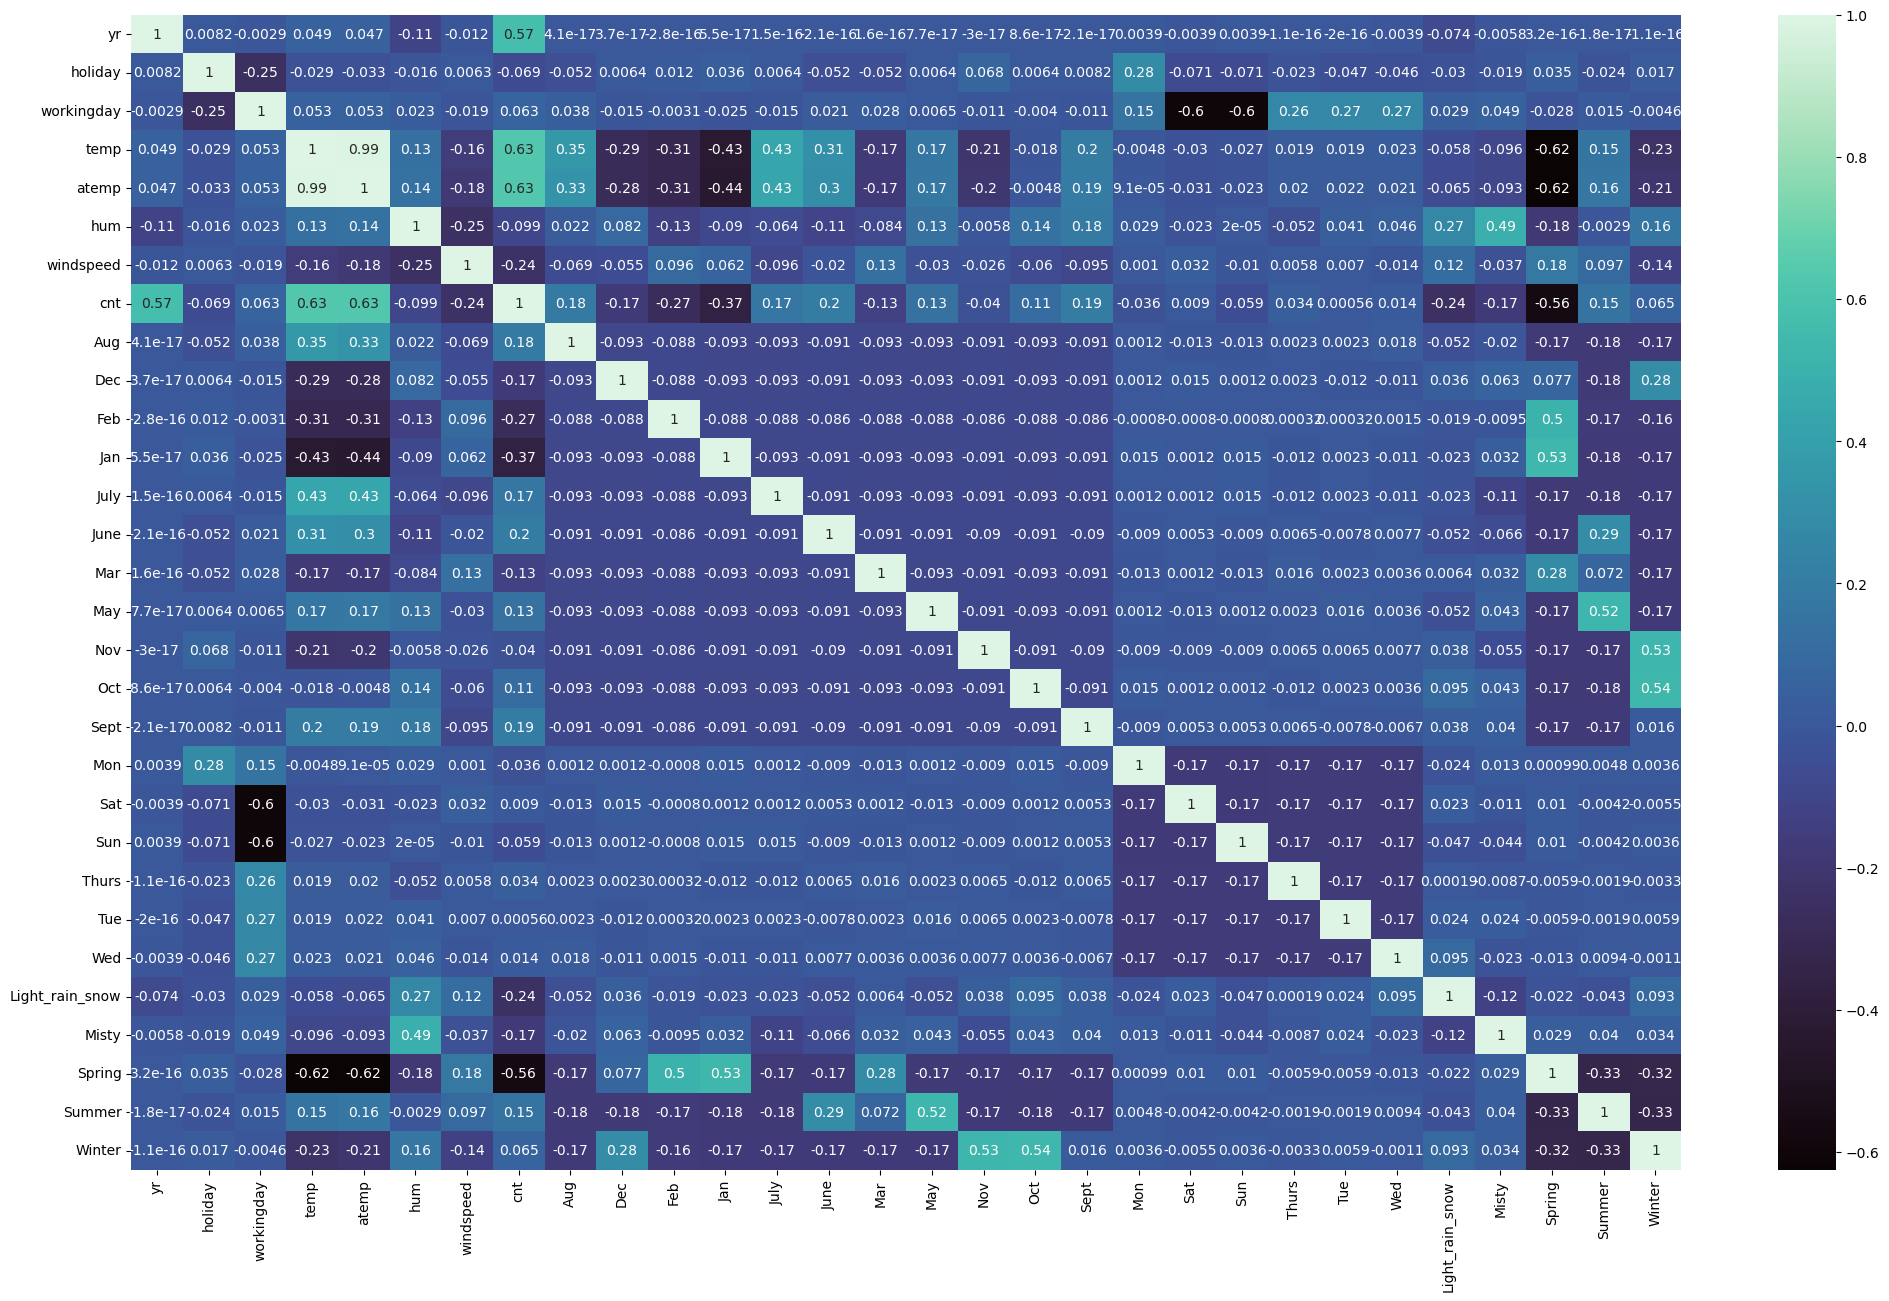

In [665]:
plt.figure(figsize=(25,15))
sns.heatmap(bikeSharing.corr(),annot=True,cmap="mako")
plt.show()

In [666]:
bikeSharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thurs,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


### Splitting into train and test

In [668]:
df_train, df_test = train_test_split(bikeSharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling
    Using Min-max scaing (normalization): To normalize data between 0 and 1

In [670]:
scaler = MinMaxScaler()

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thurs,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


<Axes: >

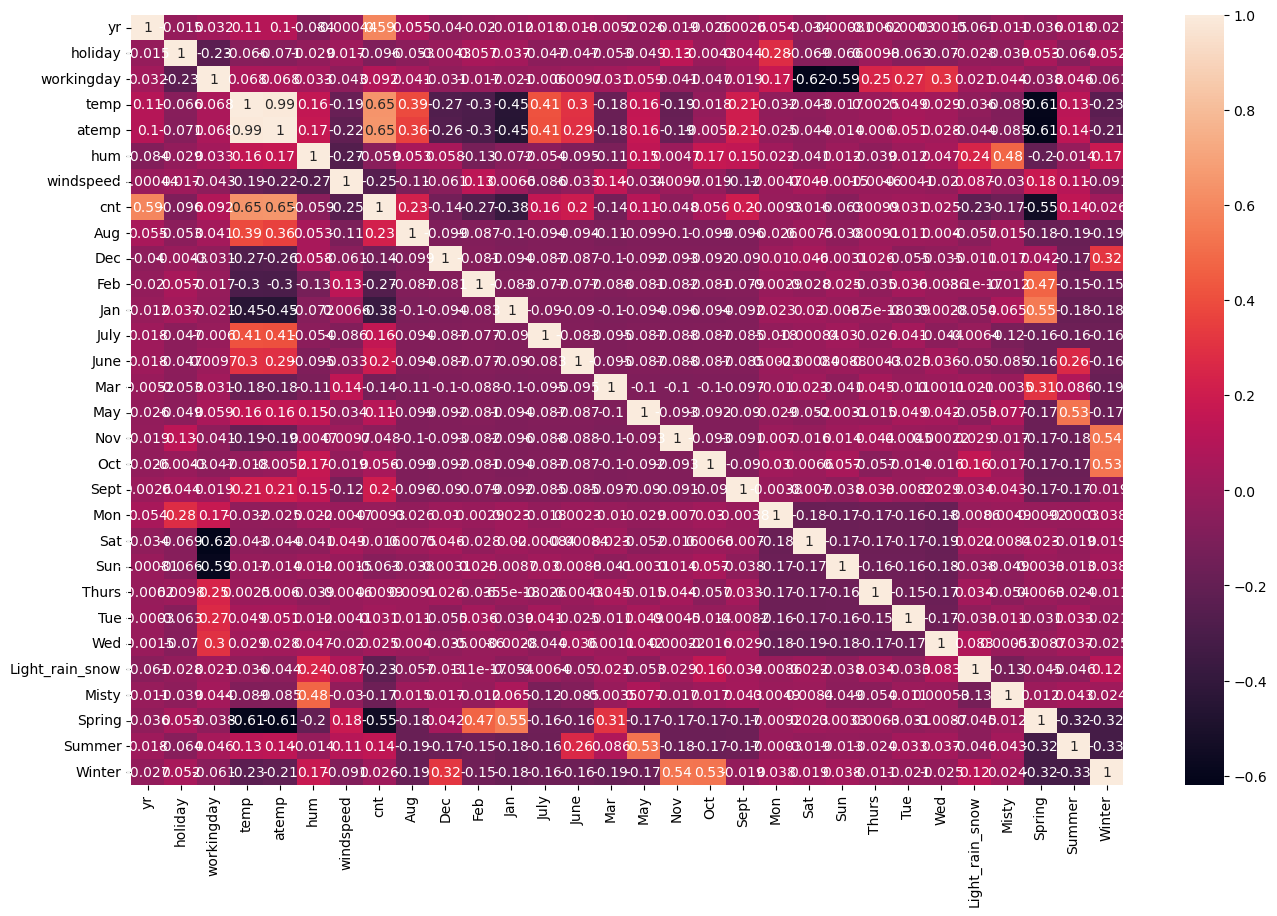

In [671]:
#heat map
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True)

# Training the Model

In [673]:
y_train = df_train.pop("cnt")
X_train = df_train

## Using RFE to select some colums and drop some

In [675]:
# creating linear regression model with sklearn.
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [676]:
# using rfe to select some features from the model.

rfe = RFE(lr, n_features_to_select=15).fit(X_train, y_train)

In [677]:
#list all rankings
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sept', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thurs', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_rain_snow', True, 1),
 ('Misty', True, 1),
 ('Spring', True, 1),
 ('Summer', True, 1),
 ('Winter', True, 1)]

In [678]:
selected_columns = X_train.columns[rfe.support_]
selected_columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan',
       'July', 'Sept', 'Sat', 'Light_rain_snow', 'Misty', 'Spring', 'Summer',
       'Winter'],
      dtype='object')

In [679]:
X_train_rfe = X_train[selected_columns]
X_train_rfe = sm.add_constant(X_train_rfe)

In [680]:
# creating a function to calculate vif.
def calculate_vif(X_train):
    vif = pd.DataFrame()
    vif['features'] = X_train.columns
    vif['Vif']  = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif = vif.sort_values(by="Vif",ascending=False)
    return vif

## Model 1

In [682]:
lr_model = sm.OLS(y_train, X_train_rfe).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          4.22e-191
Time:                        22:41:26   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
July               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sept                0.0814      0.016      4.945      0.000       0.049       0.114
Sat                 0.0536      0.014      3.694      0.000       0.025       0.082
Light_rain_snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Misty              -0.0563      0.010     -5.439      0.000      -0.077      -0.036
Spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
Summer              0.0508      0.015      3.423      0.001       0.022       0.080
Winter              0.0933      0.017      5.403      0.000       0.059       0.127
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [683]:
# Calculate vif
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
4,hum,29.370804
3,temp,17.780645
2,workingday,5.306978
5,windspeed,4.728655
12,Spring,4.531273
14,Winter,3.460305
13,Summer,2.849835
11,Misty,2.288222
0,yr,2.088739
9,Sat,1.975769


In [684]:
#drop hum as it has high VIF and low p
X_train_rfe.drop("hum",inplace=True,axis='columns')


## Model 2

In [686]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_rfe).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.60e-188
Time:                        22:41:26   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
July               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sept                0.0755      0.017      4.527      0.000       0.043       0.108
Sat                 0.0583      0.015      3.968      0.000       0.029       0.087
Light_rain_snow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Misty              -0.0813      0.009     -9.437      0.000      -0.098      -0.064
Spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
Summer              0.0445      0.015      2.967      0.003       0.015       0.074
Winter              0.0784      0.017      4.562      0.000       0.045       0.112
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [687]:
# Calculate vif
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
3,temp,7.070219
2,workingday,5.243195
4,windspeed,4.675805
11,Spring,3.074591
12,Summer,2.340269
0,yr,2.075193
13,Winter,1.977789
8,Sat,1.968247
5,Jan,1.621723
6,July,1.591949


## Model 3


In [689]:
#drop hum as it has high VIF and low p
X_train_rfe.drop("workingday",inplace=True,axis='columns')

In [690]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_rfe).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          2.48e-186
Time:                        22:41:26   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2120      0.030      6.978      0.000       0.152       0.272
yr                  0.2347      0.008     28.620      0.000       0.219       0.251
holiday            -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                0.4734      0.034     13.837      0.000       0.406       0.541
windspeed          -0.1570      0.025     -6.226      0.000      -0.207      -0.107
Jan                -0.0386      0.018     -2.159      0.031      -0.074      -0.003
July               -0.0508      0.019     -2.735      0.006      -0.087      -0.014
Sept                0.0762      0.017      4.504      0.000       0.043       0.109
Sat                 0.0201      0.011      1.787      0.075      -0.002       0.042
Light_rain_snow    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
Misty              -0.0794      0.009     -9.097      0.000      -0.097      -0.062
Spring             -0.0615      0.021     -2.902      0.004      -0.103      -0.020
Summer              0.0437      0.015      2.871      0.004       0.014       0.074
Winter              0.0755      0.017      4.334      0.000       0.041       0.110
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [691]:
# Calculate vif
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
2,temp,5.160964
3,windspeed,4.639190
10,Spring,2.763938
11,Summer,2.239242
0,yr,2.074260
12,Winter,1.797906
4,Jan,1.609683
5,July,1.591758
9,Misty,1.564232
6,Sept,1.339641


## Model 4

In [693]:
#drop hum as it has high VIF and low p
X_train_rfe.drop("Jan",inplace=True,axis='columns')

In [694]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_rfe).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          1.68e-186
Time:                        22:41:26   Log-Likelihood:                 500.38
No. Observations:                 510   AIC:                            -974.8
Df Residuals:                     497   BIC:                            -919.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1960      0.030      6.628      0.000       0.138       0.254
yr                  0.2340      0.008     28.451      0.000       0.218       0.250
holiday            -0.0941      0.026     -3.605      0.000      -0.145      -0.043
temp                0.4924      0.033     14.839      0.000       0.427       0.558
windspeed          -0.1500      0.025     -5.974      0.000      -0.199      -0.101
July               -0.0525      0.019     -2.820      0.005      -0.089      -0.016
Sept                0.0766      0.017      4.515      0.000       0.043       0.110
Sat                 0.0199      0.011      1.761      0.079      -0.002       0.042
Light_rain_snow    -0.2846      0.025    -11.529      0.000      -0.333      -0.236
Misty              -0.0803      0.009     -9.176      0.000      -0.097      -0.063
Spring             -0.0670      0.021     -3.174      0.002      -0.108      -0.026
Summer              0.0468      0.015      3.078      0.002       0.017       0.077
Winter              0.0816      0.017      4.733      0.000       0.048       0.115
==============================================================================
Omnibus:                       65.293   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.851
Skew:                          -0.706   Prob(JB):                     2.60e-31
Kurtosis:                       5.152   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [695]:
# Calculate vif
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
2,temp,5.119071
3,windspeed,4.621926
10,Summer,2.229589
9,Spring,2.095985
0,yr,2.068370
11,Winter,1.794332
4,July,1.584625
8,Misty,1.552447
5,Sept,1.337455
6,Sat,1.190957


## Model 5


In [697]:
X_train_rfe.drop("Sat",inplace=True,axis='columns')

In [698]:
# creating model.
X_train_rfe = sm.add_constant(X_train_rfe)
lr_2 = sm.OLS(y_train,X_train_rfe).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 30 Oct 2024   Prob (F-statistic):          5.06e-187
Time:                        22:41:26   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030      6.746      0.000       0.141       0.258
yr                  0.2336      0.008     28.352      0.000       0.217       0.250
holiday            -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                0.4910      0.033     14.770      0.000       0.426       0.556
windspeed          -0.1479      0.025     -5.887      0.000      -0.197      -0.099
July               -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sept                0.0768      0.017      4.517      0.000       0.043       0.110
Light_rain_snow    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Misty              -0.0802      0.009     -9.146      0.000      -0.097      -0.063
Spring             -0.0672      0.021     -3.175      0.002      -0.109      -0.026
Summer              0.0465      0.015      3.051      0.002       0.017       0.076
Winter              0.0817      0.017      4.730      0.000       0.048       0.116
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [699]:
# Calculate vif
X_train_rfe.pop("const")
calculate_vif(X_train_rfe)

,features,Vif
2,temp,5.091960
3,windspeed,4.600677
9,Summer,2.226926
8,Spring,2.078996
0,yr,2.067001
10,Winter,1.780437
4,July,1.583937
7,Misty,1.551976
5,Sept,1.336854
6,Light_rain_snow,1.081377


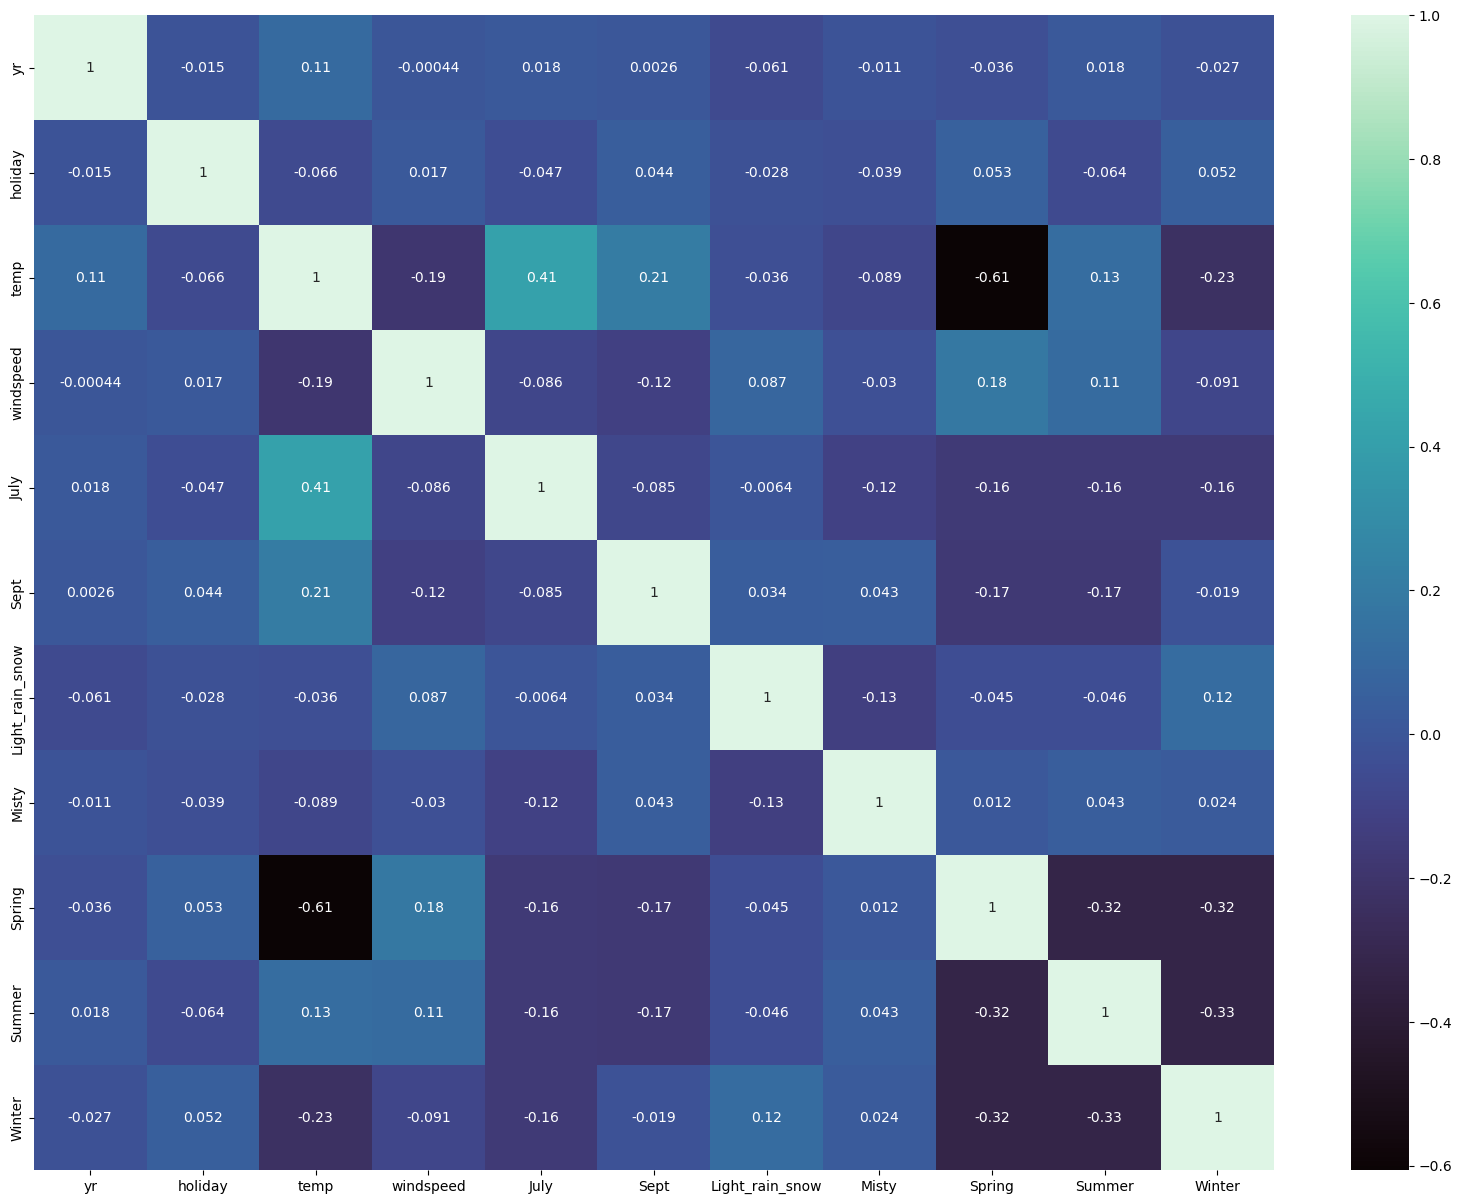

In [700]:
# heatmap for the final model dataframe.
plt.figure(figsize=(20,15))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap='mako')
plt.show()

In [701]:
# Conclusion as we all the values of p low and vif very close ro 5 or below we will accept this model

### Residual Analysis

In [703]:
#Adding constant to final model
X_train_rfe = sm.add_constant(X_train_rfe)
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'July', 'Sept',
       'Light_rain_snow', 'Misty', 'Spring', 'Summer', 'Winter'],
      dtype='object')

In [704]:
# predicting the y train values with x train 
y_train_pred = lr_2.predict(X_train_rfe)

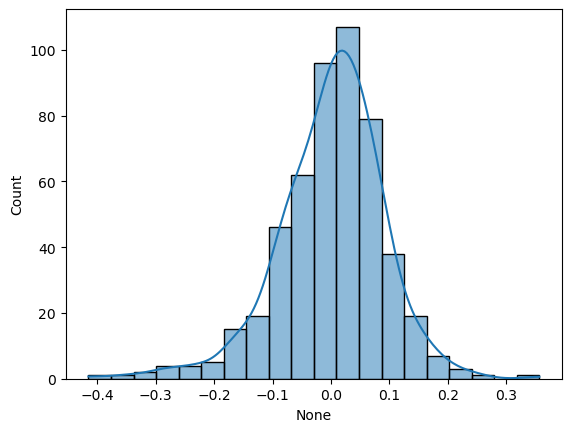

In [705]:
# checking normality of error terms
sns.histplot(x=(y_train - y_train_pred),bins=20,kde=True)
plt.show()

Error terms normally distributed

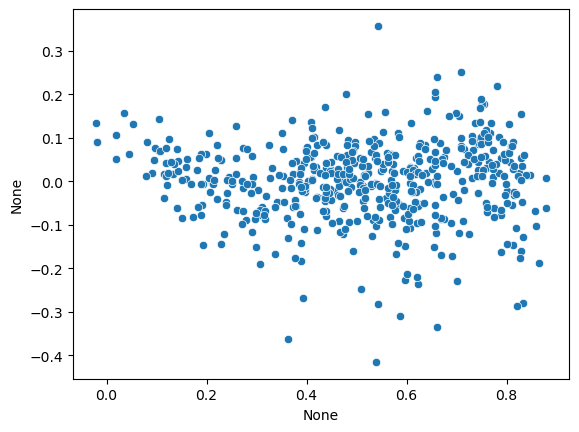

In [707]:
# Homoscedasticity check (There should be no visible pattern in residual values.)
sns.scatterplot(x=y_train_pred,y=(y_train - y_train_pred))
plt.show()

There is no visible pattern here

# Predict on test data set

In [710]:
# scaling the test data with train data scaler.

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thurs,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [711]:
# checking the data after scaling.
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,Sat,Sun,Thurs,Tue,Wed,Light_rain_snow,Misty,Spring,Summer,Winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [712]:
# dividing the data into dependent and independent. 
y_test = df_test.pop("cnt")
X_test = df_test

In [714]:
# creating X_test_rfe with final model features and removing all the other features.
X_test_rfe = X_test[[ 'yr', 'holiday', 'temp', 'windspeed', 'July', 'Sept',
       'Light_rain_snow', 'Misty', 'Spring', 'Summer', 'Winter']]
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.head()

,const,yr,holiday,temp,windspeed,July,Sept,Light_rain_snow,Misty,Spring,Summer,Winter
184,1.0,0,1,0.831783,0.084219,1,0,0,1,0,0,0
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0,1,0
299,1.0,0,0,0.511964,0.334206,0,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0,1,0


In [716]:
# predicting the y test values with x test
y_test_pred = lr_2.predict(X_test_rfe)

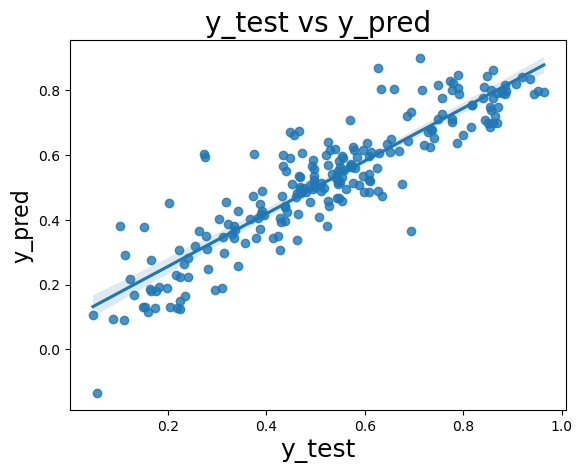

In [718]:
sns.regplot(x=(y_test),y=(y_test_pred),fit_reg=True)
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

# R2 Score

In [725]:
print('Train r2: ',r2_score(y_true=y_train,y_pred=y_train_pred))
print('Test r2: ',r2_score(y_true=y_test,y_pred=y_test_pred))

Train r2:  0.835281973840364
Test r2:  0.8052680349048551


In [731]:
lr_2.params

const              0.199434
yr                 0.233570
holiday           -0.097463
temp               0.490988
windspeed         -0.147919
July              -0.052057
Sept               0.076846
Light_rain_snow   -0.284199
Misty             -0.080167
Spring            -0.067169
Summer             0.046487
Winter             0.081741
dtype: float64

# Final Equation

cnt = yr*(0.233570) + holiday*(-0.097463) + temp*(0.490988) + windspeed*(-0.147919) + July*(-0.052057) + Sept*(0.076846) + Light_rain_snow*(-0.284199) + Misty*(-0.080167) + Spring*(-0.067169) + Summer*(0.046487) + Winter*(0.081741) + 0.199434